In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')  # 판다스 라이브러리를 사용하여 제주특별자치도_해양환경 연안 측정 데이터_20221120.csv를 불러옴
df = df.dropna()  # 날짜데이터에 결측치가 존재하여 결측치를 평균값이나 중간값으로 대처하기않고 제거함
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)

# 더미함수를 사용하여 범주형 데이터를 원-핫 인코딩으로 처리하여 분류할 수 있도록 함 #
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

# 날짜데이터를 판다스 to_datetime함수를 사용하여 연속형 데이터로 처리
df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

# 인코딩해둔 계절 정보를 바탕으로 월별로 분류하여 봄,여름,가을,겨울로 분류하여 계절 column을 만듬
def seasonal(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    else:
        return '가을'


df['계절'] = df['월'].apply(seasonal)

dummies = pd.get_dummies(df['계절'], prefix='계절').astype(int)

df = df.drop('계절', axis=1)

df = pd.concat([df, dummies], axis=1)

# 위도, 경도는 분석에 영향을 주는 피처가 아니라고 판한하여 drop함
df = df.drop(['측정 연도',	'측정 월','위도',	'경도',],axis = 1)

In [2]:
# 성산, 제주, 서귀포,조천,표선,한림,대정을 포함하는 데이터들만 모아 분석 진행
seongsan = df[df['정점명'].isin(['성산포1', '성산포2'])].drop(['정점명'], axis=1)



In [3]:
seongsan

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,날씨_흐림,수층_저층,수층_표층,년,월,일,계절_가을,계절_겨울,계절_봄,계절_여름
18,2021-11-18,16.0,12.0,1,19.35,33.98,8.15,9.25,1.37,11.10,...,0,0,1,2021,11,18,1,0,0,0
19,2021-11-18,46.0,12.0,1,20.00,34.08,8.15,8.32,1.52,13.76,...,0,0,1,2021,11,18,1,0,0,0
28,2021-11-18,16.0,12.0,1,19.34,33.99,8.11,7.88,1.00,8.13,...,0,1,0,2021,11,18,1,0,0,0
29,2021-11-18,46.0,12.0,1,19.55,34.00,8.11,8.21,1.22,9.55,...,0,1,0,2021,11,18,1,0,0,0
39,2021-08-31,16.0,9.0,2,23.38,31.35,8.26,10.35,2.05,7.20,...,0,0,1,2021,8,31,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2011-05-16,17.0,7.8,1,15.18,34.16,8.38,8.23,0.52,16.70,...,0,1,0,2011,5,16,0,0,1,0
1614,2011-02-22,13.0,8.0,1,13.47,34.60,8.10,9.07,1.36,9.50,...,0,0,1,2011,2,22,0,1,0,0
1615,2011-02-22,50.0,8.2,1,13.73,34.54,8.11,9.06,1.49,2.40,...,0,0,1,2011,2,22,0,1,0,0
1625,2011-02-22,13.0,8.0,1,13.37,34.60,8.10,9.86,1.52,8.90,...,0,1,0,2011,2,22,0,1,0,0


In [4]:
seongsan.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일', '계절_가을', '계절_겨울', '계절_봄', '계절_여름'],
      dtype='object')

In [5]:
#파이썬 groupby함수를 사용하여 연간수온의 평균을 구함
year_avg = seongsan.groupby('년')['수온'].mean()

year_avg

년
2011    18.020000
2012    16.875000
2013    18.827500
2014    17.872500
2015    18.369375
2016    18.745000
2017    18.438750
2018    17.676875
2019    19.608750
2020    19.066250
2021    18.568125
Name: 수온, dtype: float64

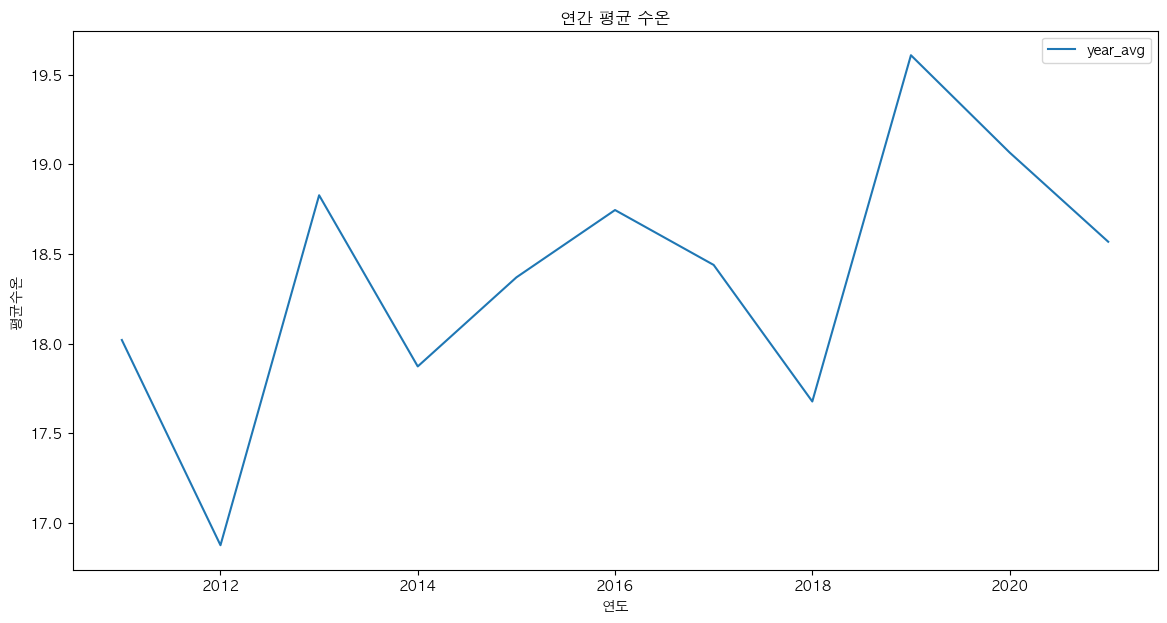

In [6]:
# matplotlib을 사용하여 plot함수를 통해 연간평균 수온을 시각화
plt.figure(figsize=(14, 7))
plt.plot(year_avg, label='year_avg')
plt.title('연간 평균 수온')
plt.xlabel('연도')
plt.ylabel('평균수온')
plt.legend()
plt.show()

In [7]:
#파이썬 groupby함수를 사용하여 월평균 수온도 계산하여 수온의 평균을 구함
month_avg = seongsan.groupby(['년', '월'])['수온'].mean()

month_avg

년     월 
2011  2     13.8275
      5     15.3250
      8     22.4300
      11    20.4975
2012  2     14.0350
      5     16.4950
      8     20.0950
2013  2     13.3100
      5     16.8750
      8     24.4350
      11    20.6900
2014  2     15.1925
      5     17.5550
      8     20.7050
      11    18.0375
2015  2     14.5875
      5     17.2600
      8     21.9950
      11    19.6350
2016  2     14.4525
      5     16.1575
      8     23.7875
      11    20.5825
2017  2     14.0875
      5     15.6700
      8     22.5625
      11    21.4350
2018  2     13.5675
      5     16.6125
      8     21.0775
      11    19.4500
2019  2     14.9600
      5     16.7100
      8     25.5250
      11    21.2400
2020  2     15.5500
      5     16.3550
      8     24.3025
      11    20.0575
2021  2     14.8100
      5     17.5700
      8     22.3325
      11    19.5600
Name: 수온, dtype: float64

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


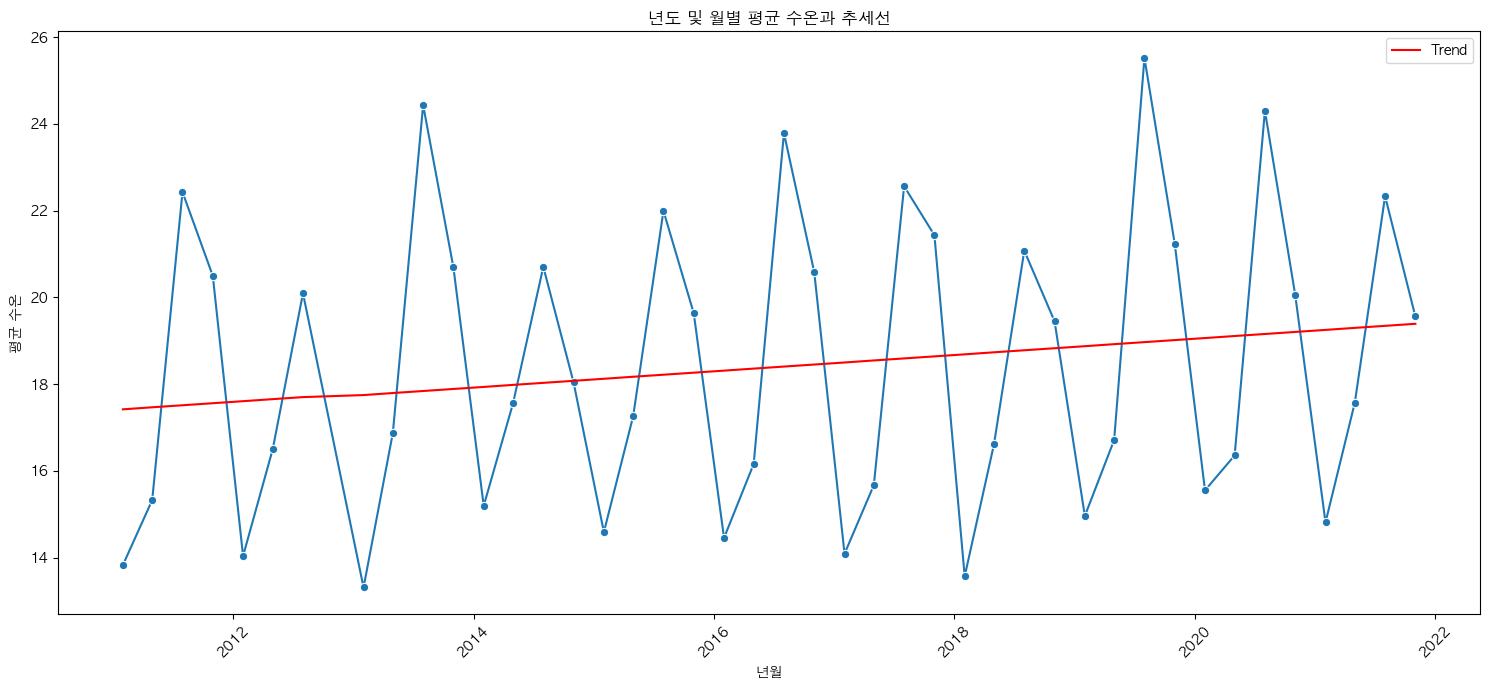

In [8]:
#연간 월평균 수온의 추세선을 사각화하고 sklearn의 LinearRegression을 사용하여 추세선을 시각화함
from sklearn.linear_model import LinearRegression

monthly_avg_temp_df = month_avg.reset_index()
monthly_avg_temp_df['년월'] = monthly_avg_temp_df['년'].astype(str) + '-' + monthly_avg_temp_df['월'].astype(str)
monthly_avg_temp_df['년월'] = pd.to_datetime(monthly_avg_temp_df['년월'])

# 선 그래프 그리기
plt.figure(figsize=(15, 7))
sns.lineplot(x='년월', y='수온', data=monthly_avg_temp_df, marker='o')

# 추세선 추가하기
# 날짜 데이터를 숫자로 변환 (LinearRegression을 위해)
X = np.array(monthly_avg_temp_df.index).reshape(-1, 1)
y = monthly_avg_temp_df['수온']

# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 추세선 계산
trend = lin_reg.predict(X)

# 추세선 그리기
plt.plot(monthly_avg_temp_df['년월'], trend, label='Trend', color='red')

# 그래프 설정
plt.title('년도 및 월별 평균 수온과 추세선')
plt.xlabel('년월')
plt.ylabel('평균 수온')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# sklearn의 train_test_split을 사용하지 않고 2021년 이전 데이터들을 train데이터로, 이후를 test데이터로 분리
train_df = seongsan[seongsan['년'] < 2021].drop('측정 일자', axis = 1)

test_df = seongsan[seongsan['년'] == 2021].drop('측정 일자', axis = 1)

X_train = train_df.drop('수온', axis=1)
y_train = train_df['수온']

X_test = test_df.drop('수온', axis=1)
y_test = test_df['수온']



In [10]:
# 랜덤포레스트를 활용화여 2021이전의 데이터를 학습한것을 바탕으로 21년도에 온도상승을 예측할 수 있는지 확인
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE : ", mae)


MAE :  0.6847000000000023


In [11]:
predictions

array([20.0643, 20.6768, 18.8576, 19.3385, 26.6931, 26.8419, 20.8278,
       18.3224, 17.0188, 16.9144, 16.8177, 16.8362, 15.1004, 14.8332,
       15.0118, 14.9771])

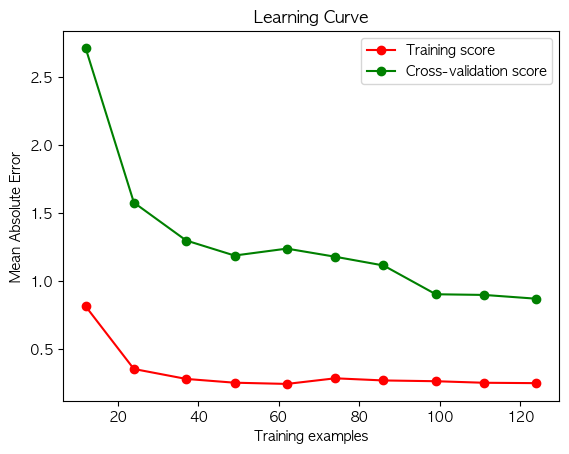

In [12]:
#sklearn의 learning_curve를 활용하여 train과정에서 mae의 변화를 시각화함
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), 
    X_train, 
    y_train, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10), 
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()


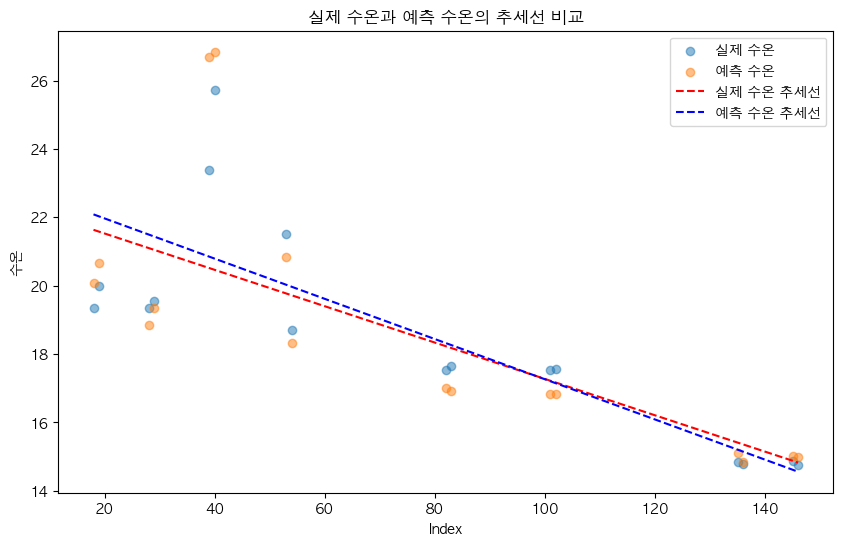

In [13]:
#실제값과 test하여 나온 예측값들을 시각화하여 모델이 예측하였을때 평균수온의 증가를 적절히 예측하였는지 시각화하였으며 추세선을 통하여 예측과정의 추세를 시각화하였음
import matplotlib.pyplot as plt
import numpy as np

# 실제 값에 대한 추세선 계산
z = np.polyfit(y_test.index, y_test, 1)
p = np.poly1d(z)

# 예측 값에 대한 추세선 계산
z_pred = np.polyfit(y_test.index, predictions, 1)
p_pred = np.poly1d(z_pred)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='실제 수온', alpha=0.5)
plt.scatter(y_test.index, predictions, label='예측 수온', alpha=0.5)

# 추세선 그리기
plt.plot(y_test.index, p(y_test.index), "r--", label='실제 수온 추세선')
plt.plot(y_test.index, p_pred(y_test.index), "b--", label='예측 수온 추세선')

plt.title('실제 수온과 예측 수온의 추세선 비교')
plt.xlabel('Index')
plt.ylabel('수온')
plt.legend()
plt.show()


In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  1.9322500000000005


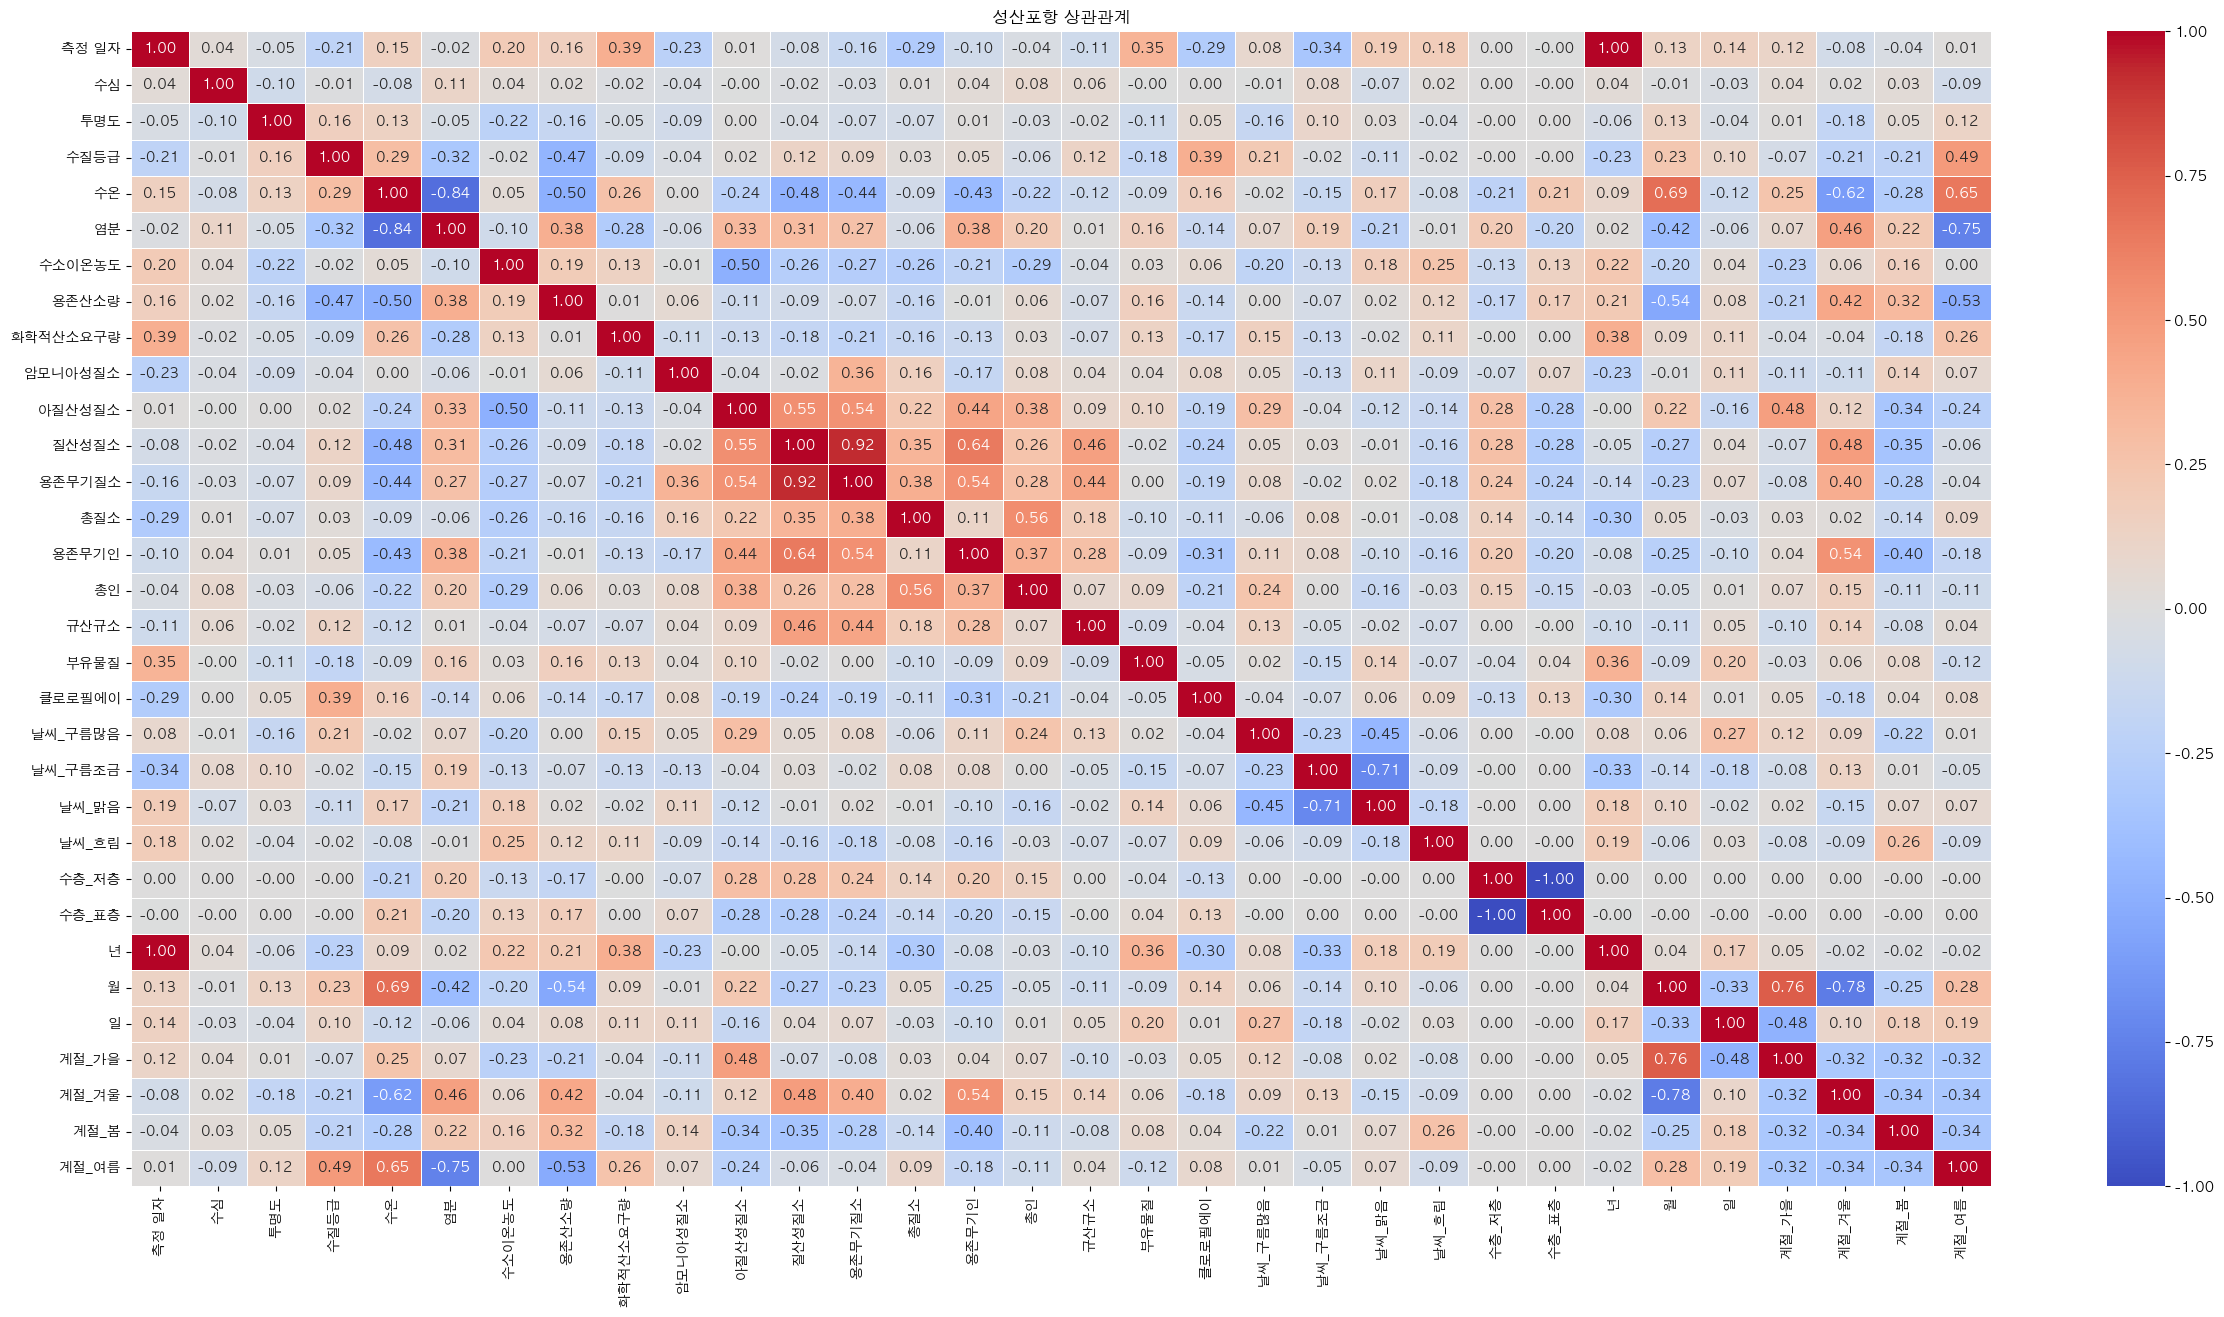

In [15]:
# Calculating the correlation between '최고기온', '최저기온', and '평균기온'
seongsancorr = seongsan.corr()

# Plotting the heatmap for these specific features
plt.figure(figsize=(30, 15))
sns.heatmap(seongsancorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('성산포항 상관관계')
plt.show()


# 기온과 월과 수온의 상관관계 파악

In [16]:
temp = seongsan.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [17]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월,계절_가을,계절_겨울,계절_봄,계절_여름
18,19.35,0,0,1,0,11,1,0,0,0
19,20.00,0,0,1,0,11,1,0,0,0
28,19.34,0,0,1,0,11,1,0,0,0
29,19.55,0,0,1,0,11,1,0,0,0
39,23.38,0,0,1,0,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1591,15.18,0,0,1,0,5,0,0,1,0
1614,13.47,0,1,0,0,2,0,1,0,0
1615,13.73,0,1,0,0,2,0,1,0,0
1625,13.37,0,1,0,0,2,0,1,0,0


In [18]:
tempcorrs=temp.corr()


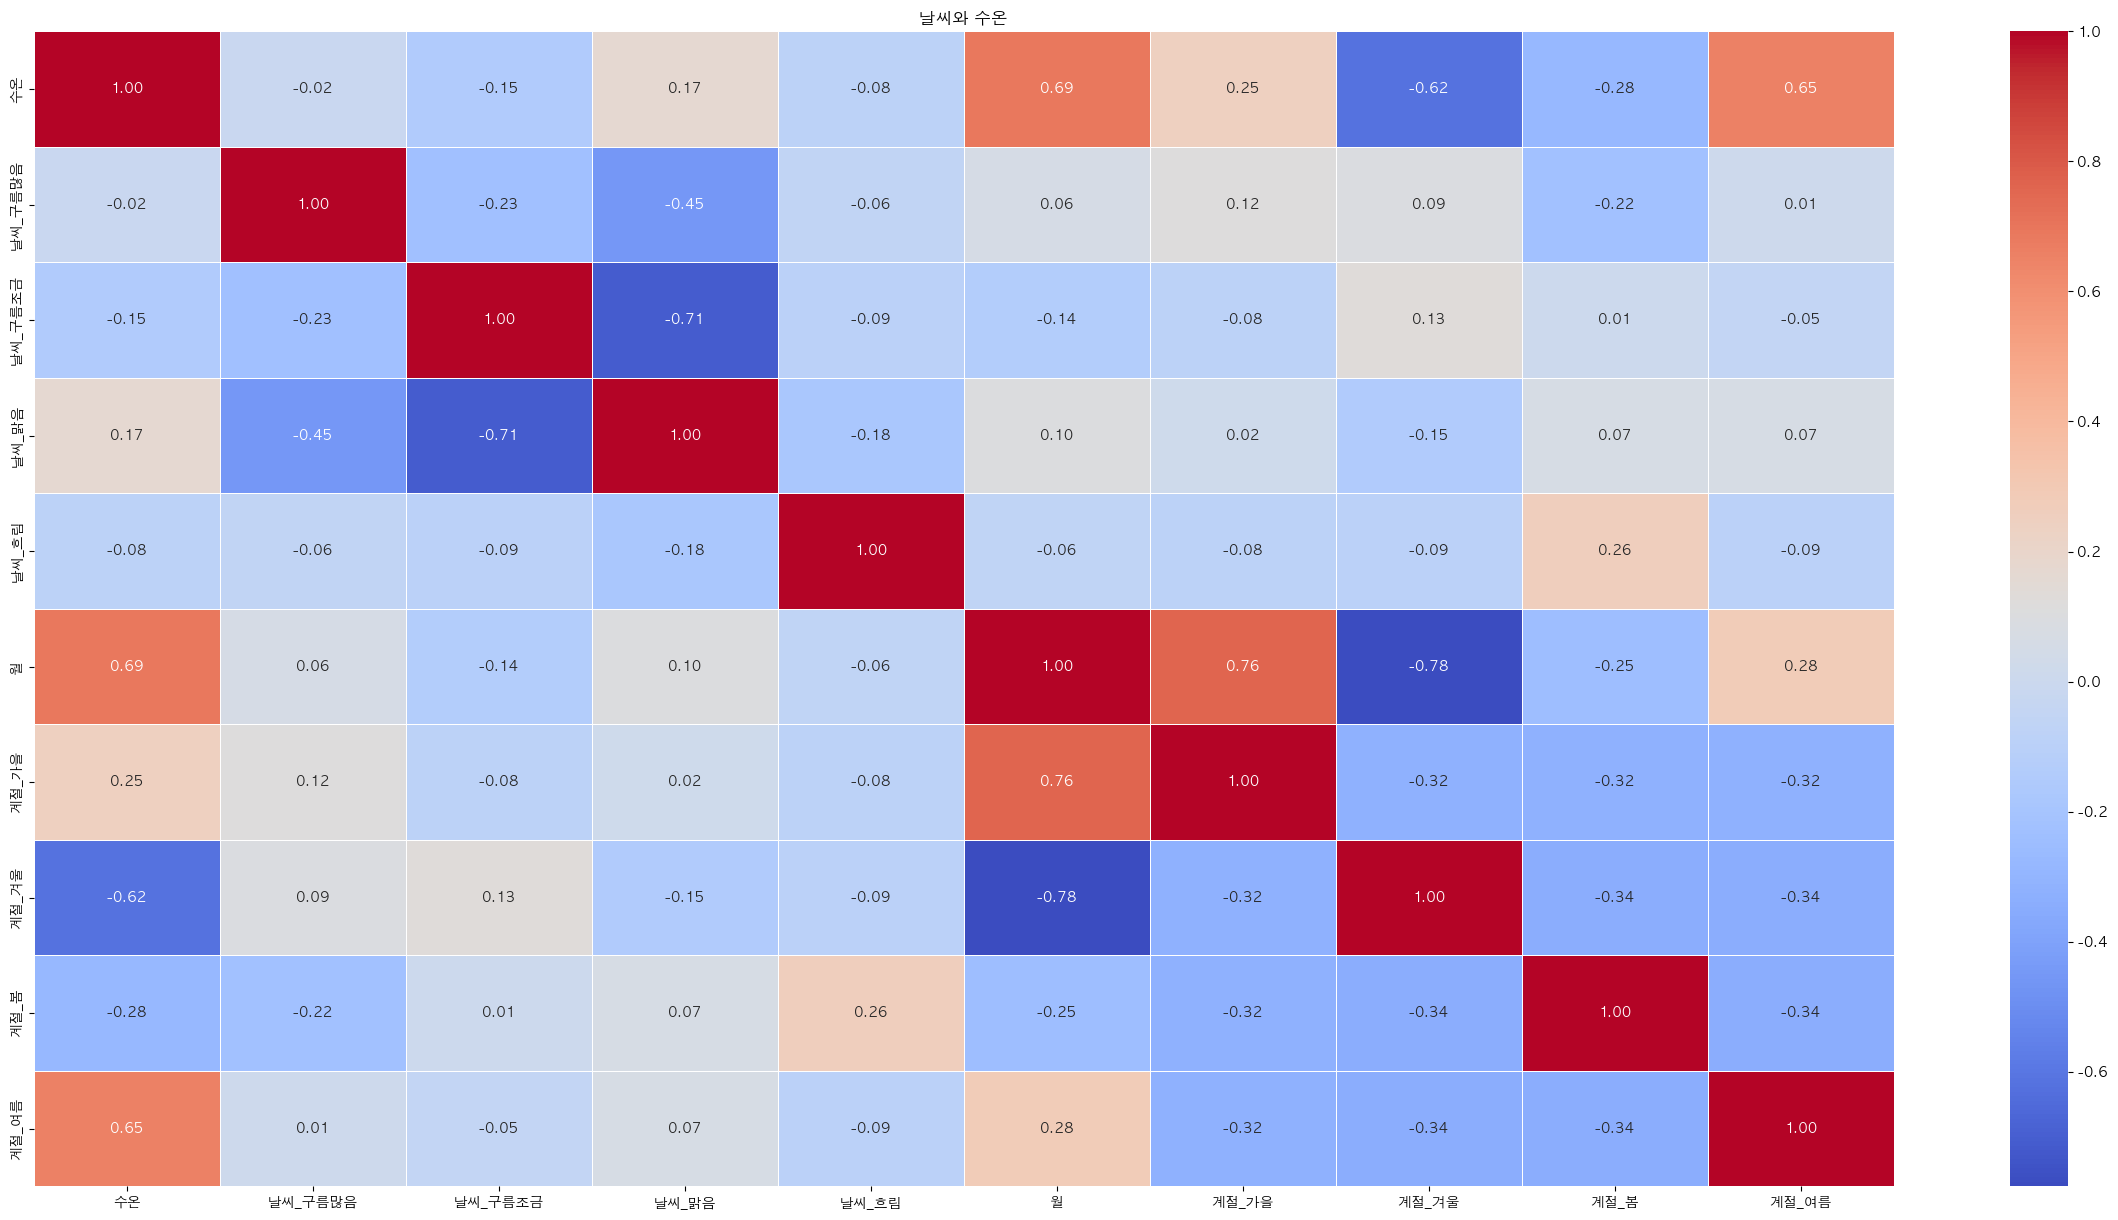

In [19]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

# 화학적 요소들사이의 상관관계 파악

In [20]:
che = seongsan.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [21]:
che

,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,질산성질소,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이,계절_가을,계절_겨울,계절_봄,계절_여름
18,8.15,9.25,1.37,11.10,3.91,29.48,44.49,151.62,7.29,17.67,113.96,23.60,1.07,1,0,0,0
19,8.15,8.32,1.52,13.76,2.49,12.81,29.06,132.66,3.29,16.46,61.88,23.90,0.96,1,0,0,0
28,8.11,7.88,1.00,8.13,5.60,48.33,62.06,219.52,10.23,19.10,175.84,23.35,0.67,1,0,0,0
29,8.11,8.21,1.22,9.55,5.35,42.88,57.78,169.09,7.53,20.93,153.13,20.75,0.84,1,0,0,0
39,8.26,10.35,2.05,7.20,1.20,14.00,22.40,110.53,1.40,7.78,46.48,28.10,1.82,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,8.38,8.23,0.52,16.70,2.40,26.80,45.90,243.50,7.00,24.70,196.40,2.30,0.00,0,0,1,0
1614,8.10,9.07,1.36,9.50,3.00,34.50,47.00,227.50,15.20,25.20,229.70,6.10,0.40,0,1,0,0
1615,8.11,9.06,1.49,2.40,4.10,35.60,42.20,256.00,16.30,29.60,183.90,3.20,0.61,0,1,0,0
1625,8.10,9.86,1.52,8.90,4.20,51.00,64.10,239.50,11.70,26.80,193.00,7.80,0.64,0,1,0,0


In [22]:
checorrs = che.corr()

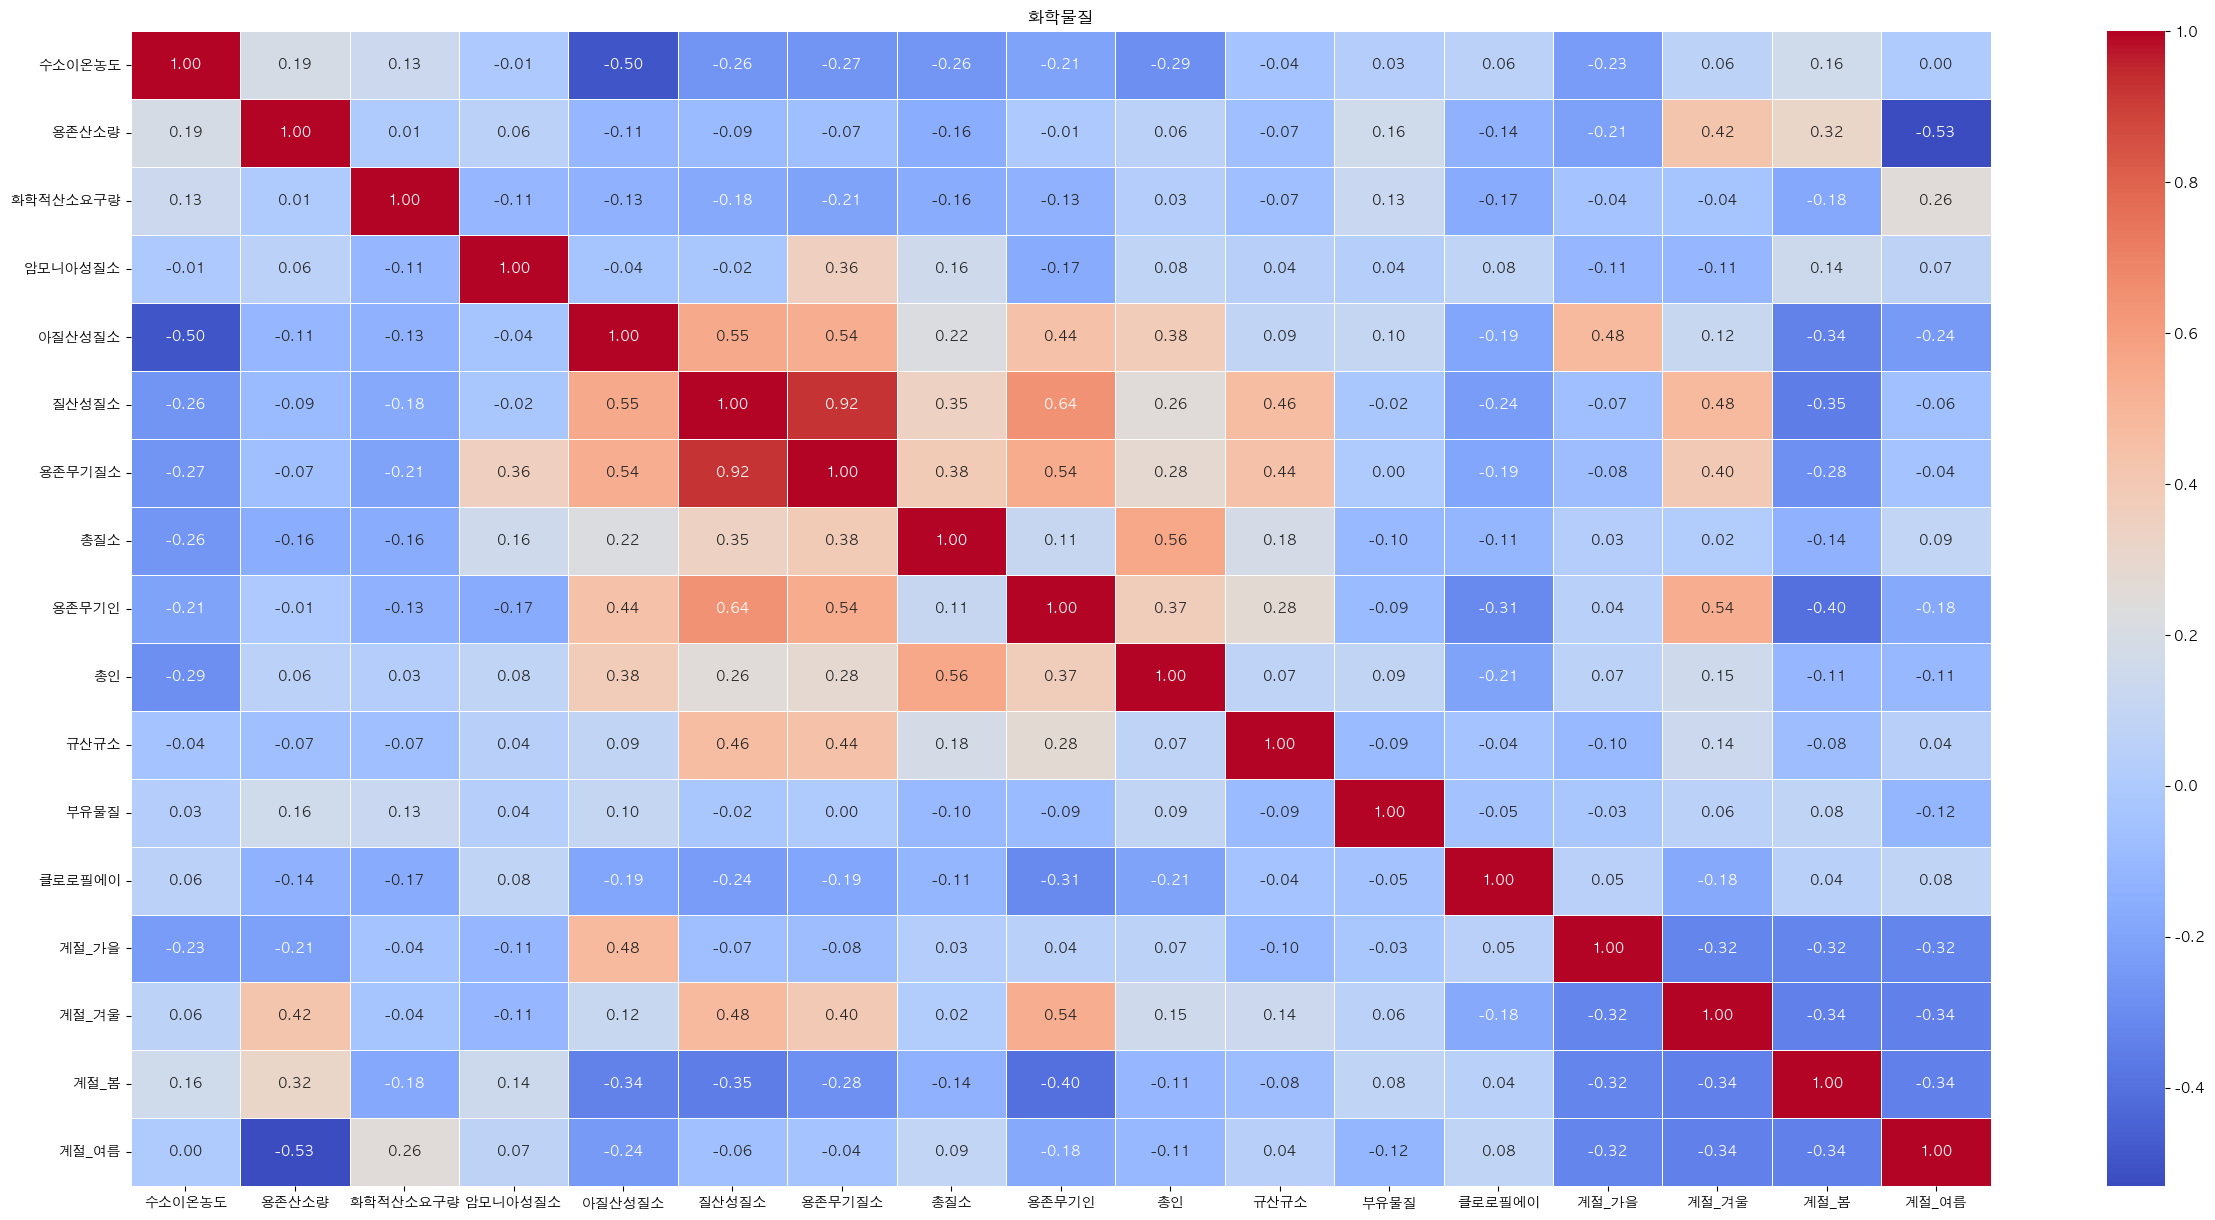

In [23]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

# 수온과 화학적 요소들 사이 상관관계 파악

In [24]:
che2 = seongsan.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [25]:
che2

,수온,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,질산성질소,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이,계절_가을,계절_겨울,계절_봄,계절_여름
18,19.35,8.15,9.25,1.37,11.10,3.91,29.48,44.49,151.62,7.29,17.67,113.96,23.60,1.07,1,0,0,0
19,20.00,8.15,8.32,1.52,13.76,2.49,12.81,29.06,132.66,3.29,16.46,61.88,23.90,0.96,1,0,0,0
28,19.34,8.11,7.88,1.00,8.13,5.60,48.33,62.06,219.52,10.23,19.10,175.84,23.35,0.67,1,0,0,0
29,19.55,8.11,8.21,1.22,9.55,5.35,42.88,57.78,169.09,7.53,20.93,153.13,20.75,0.84,1,0,0,0
39,23.38,8.26,10.35,2.05,7.20,1.20,14.00,22.40,110.53,1.40,7.78,46.48,28.10,1.82,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,15.18,8.38,8.23,0.52,16.70,2.40,26.80,45.90,243.50,7.00,24.70,196.40,2.30,0.00,0,0,1,0
1614,13.47,8.10,9.07,1.36,9.50,3.00,34.50,47.00,227.50,15.20,25.20,229.70,6.10,0.40,0,1,0,0
1615,13.73,8.11,9.06,1.49,2.40,4.10,35.60,42.20,256.00,16.30,29.60,183.90,3.20,0.61,0,1,0,0
1625,13.37,8.10,9.86,1.52,8.90,4.20,51.00,64.10,239.50,11.70,26.80,193.00,7.80,0.64,0,1,0,0


In [26]:
che2corrs = che2.corr()

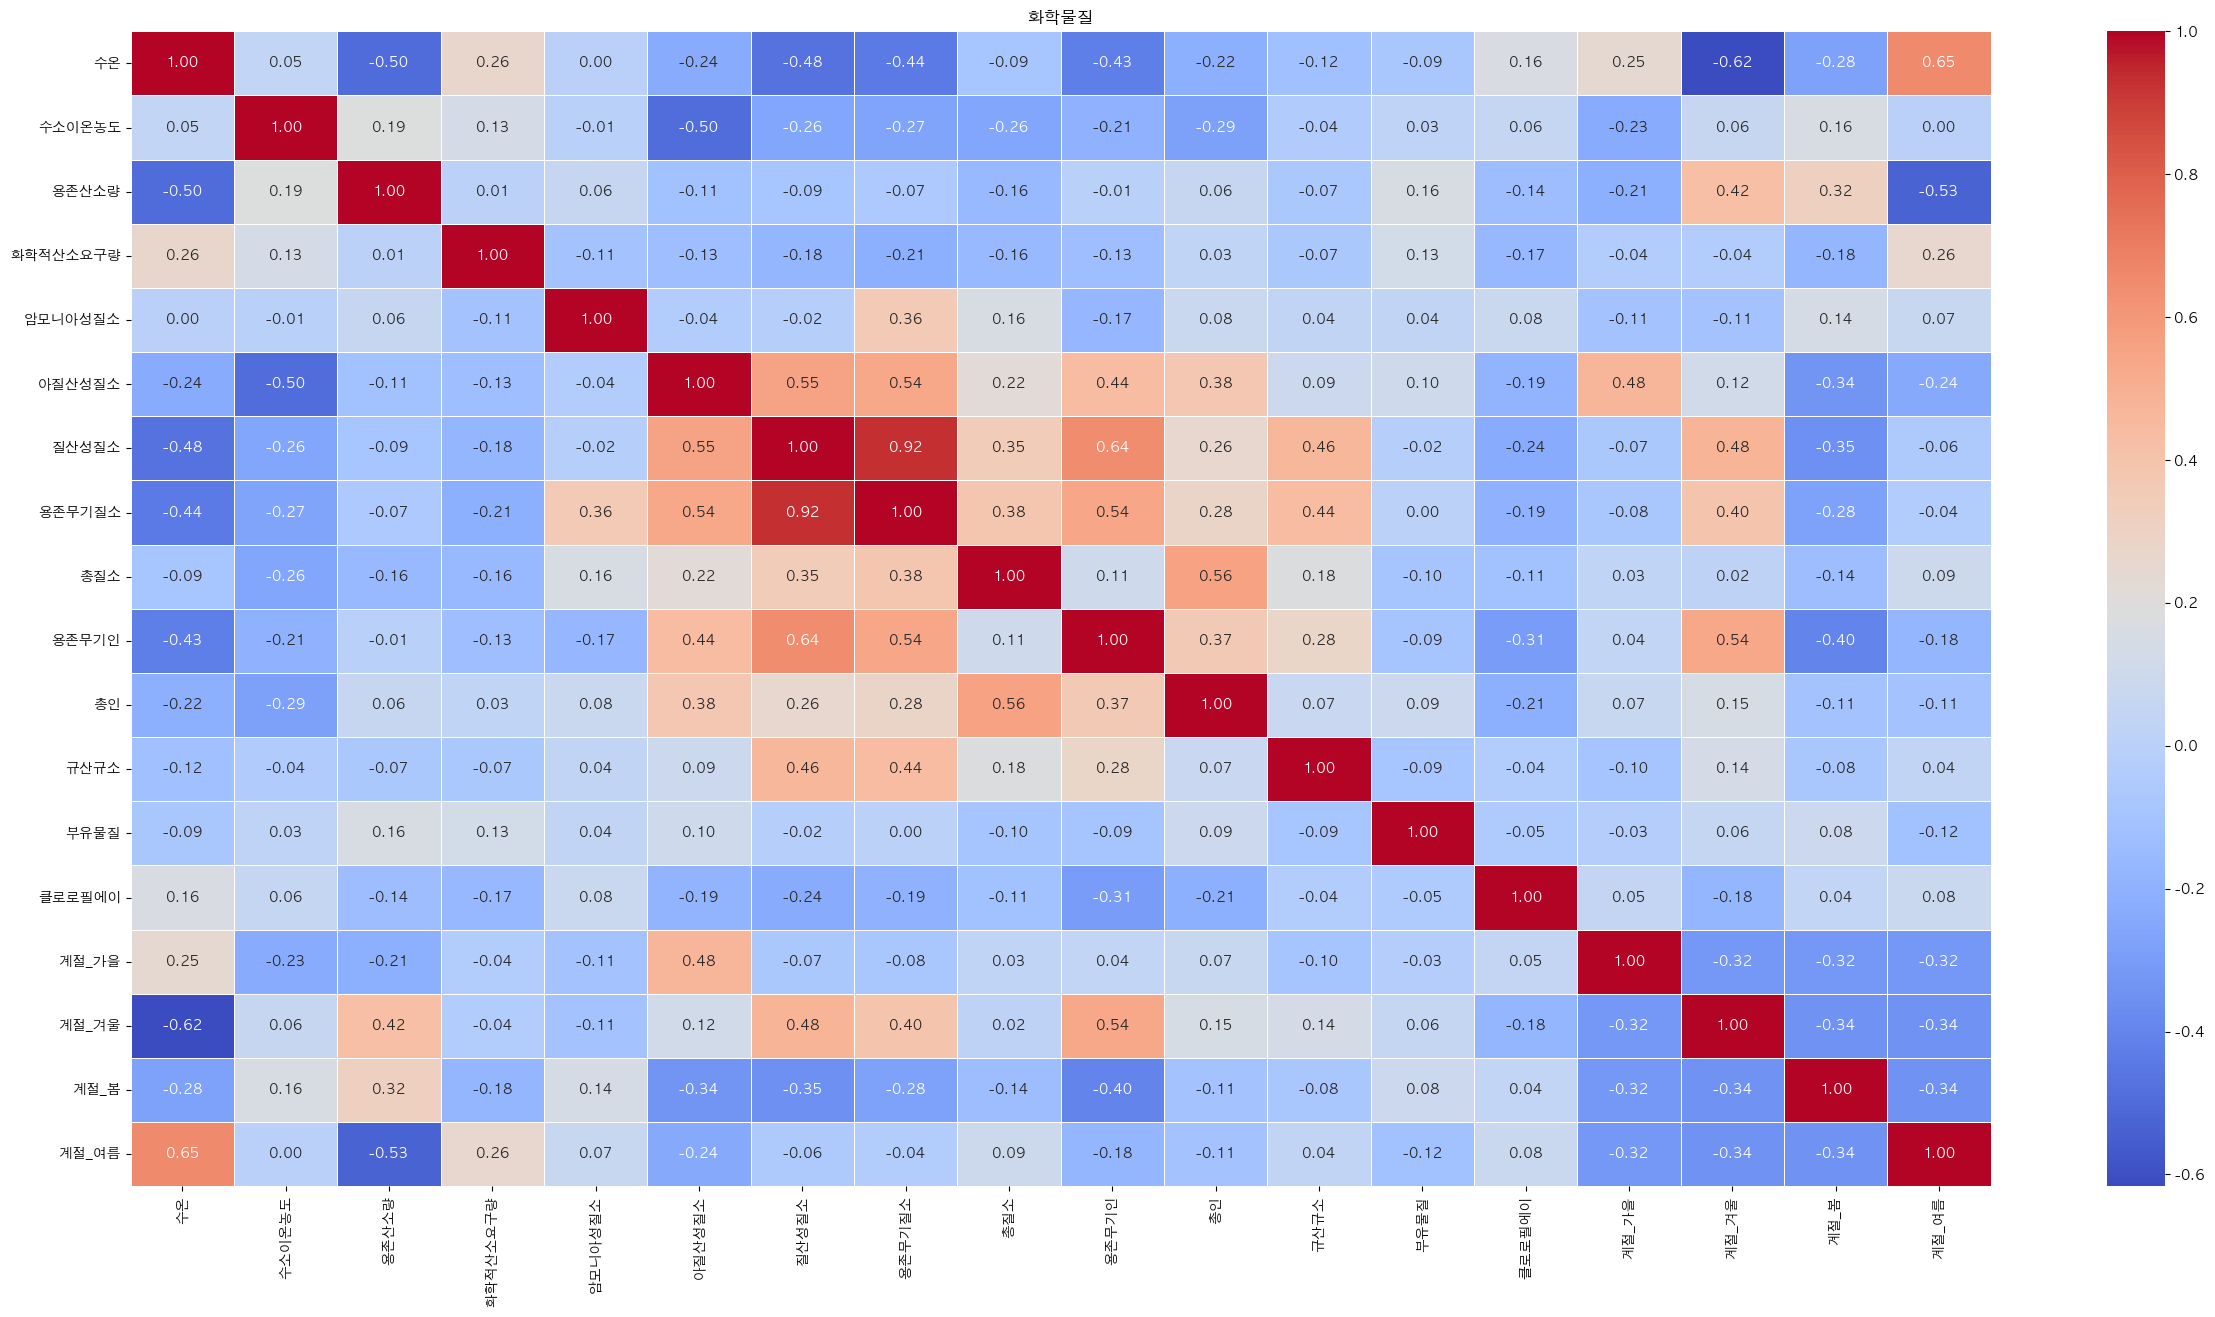

In [27]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

# 이상치 파악

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/36734

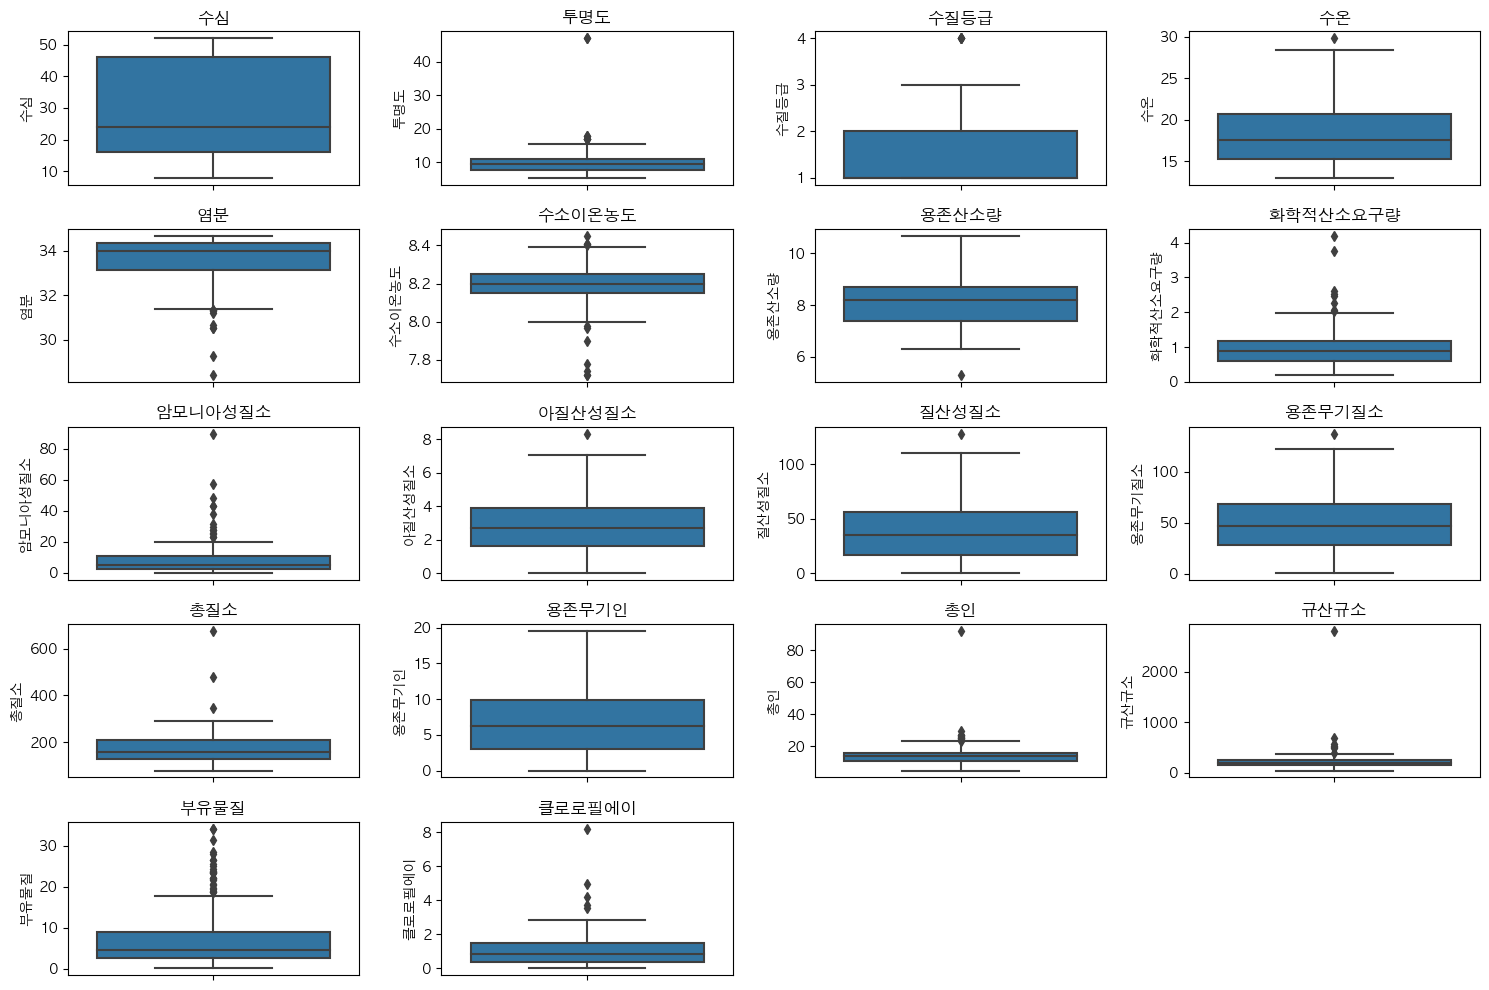

In [28]:
# boxplot을 활용하여 피쳐들의 값들 중 이상치를 파악함
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=seongsan[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/38795

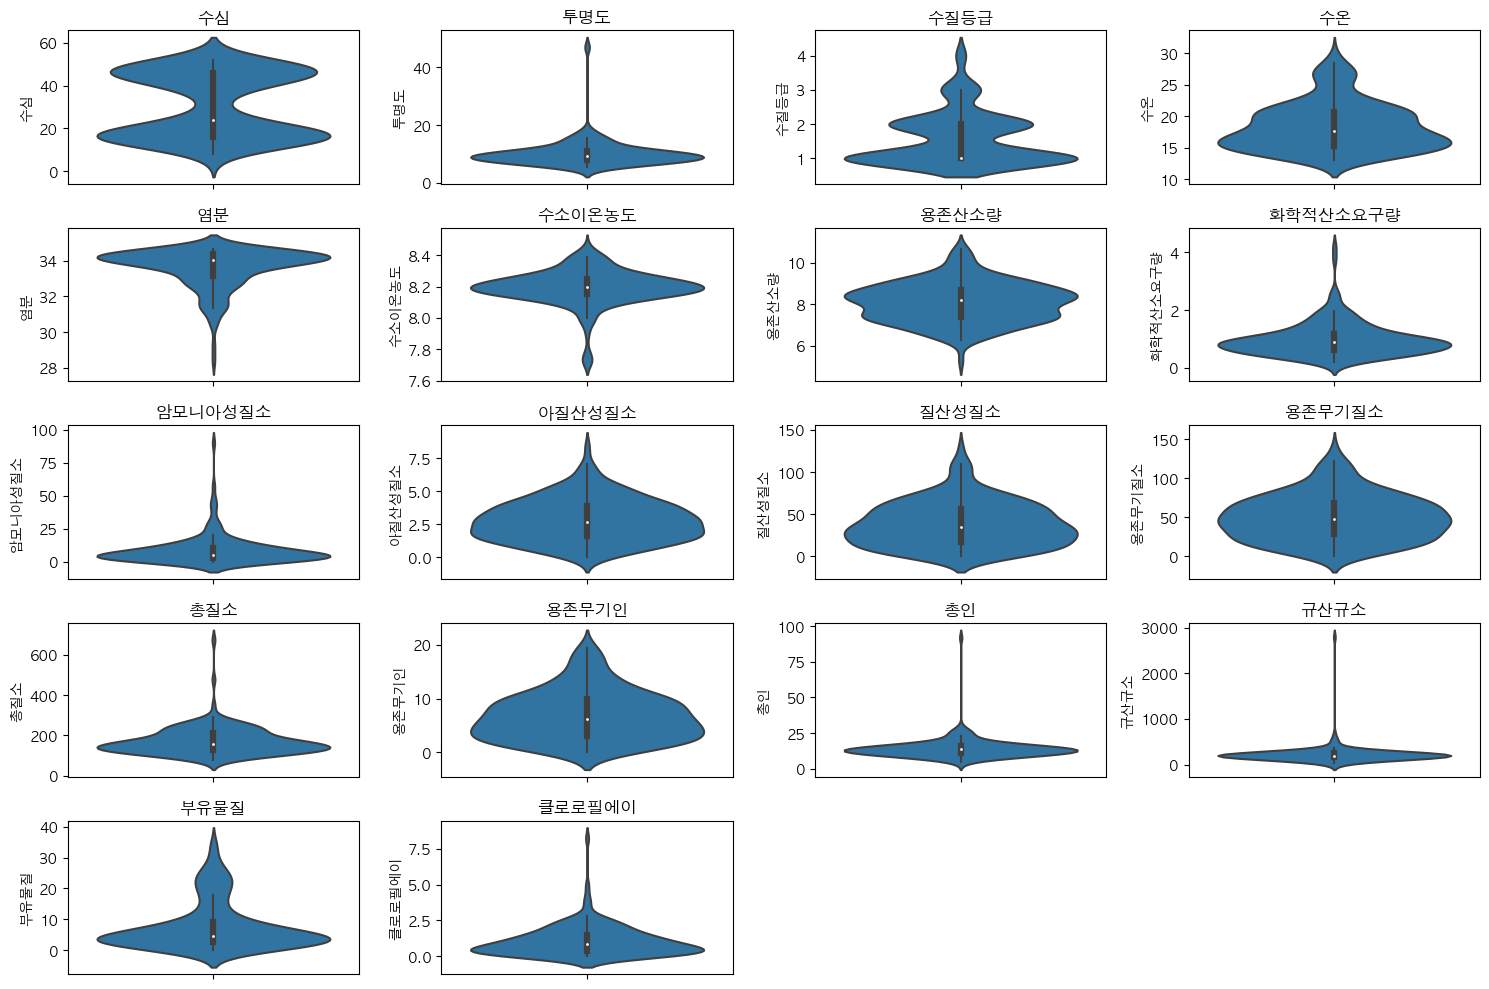

In [29]:
# boxplot을 활용하여 이상치를 판단하기보다 violinplot을 통해 값의 분포를 시각화하는것의 연안의 특징을 더 잘 대변해준다고 판단하여 violinplot사용
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=seongsan[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

# 산점도 시각화

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_93097/429291424.p

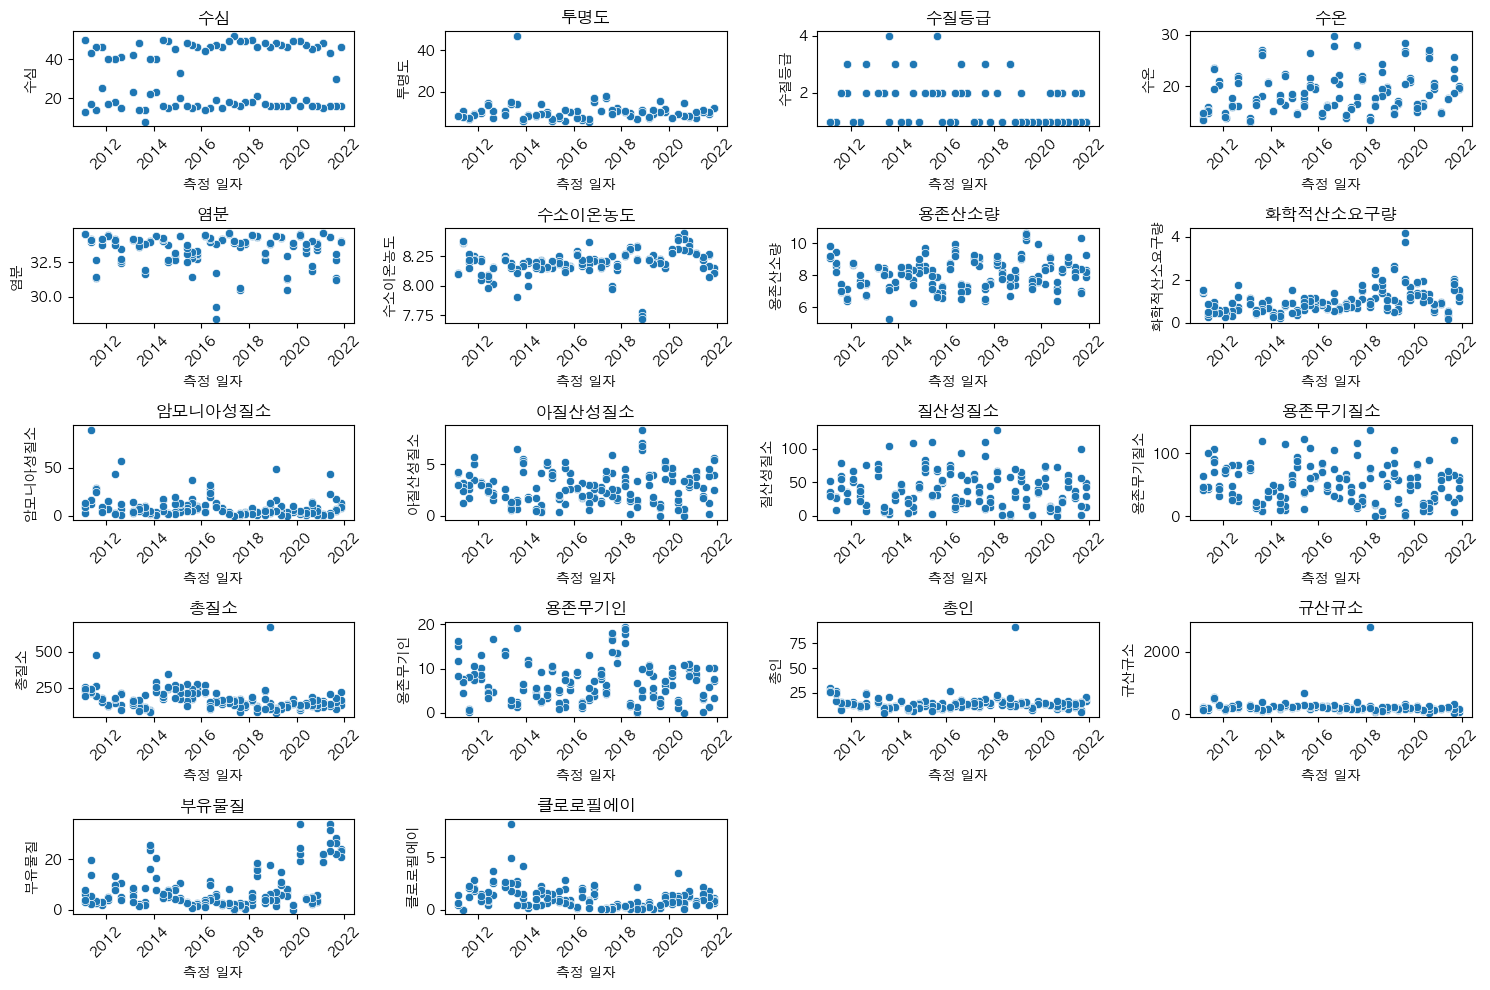

In [30]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=seongsan, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

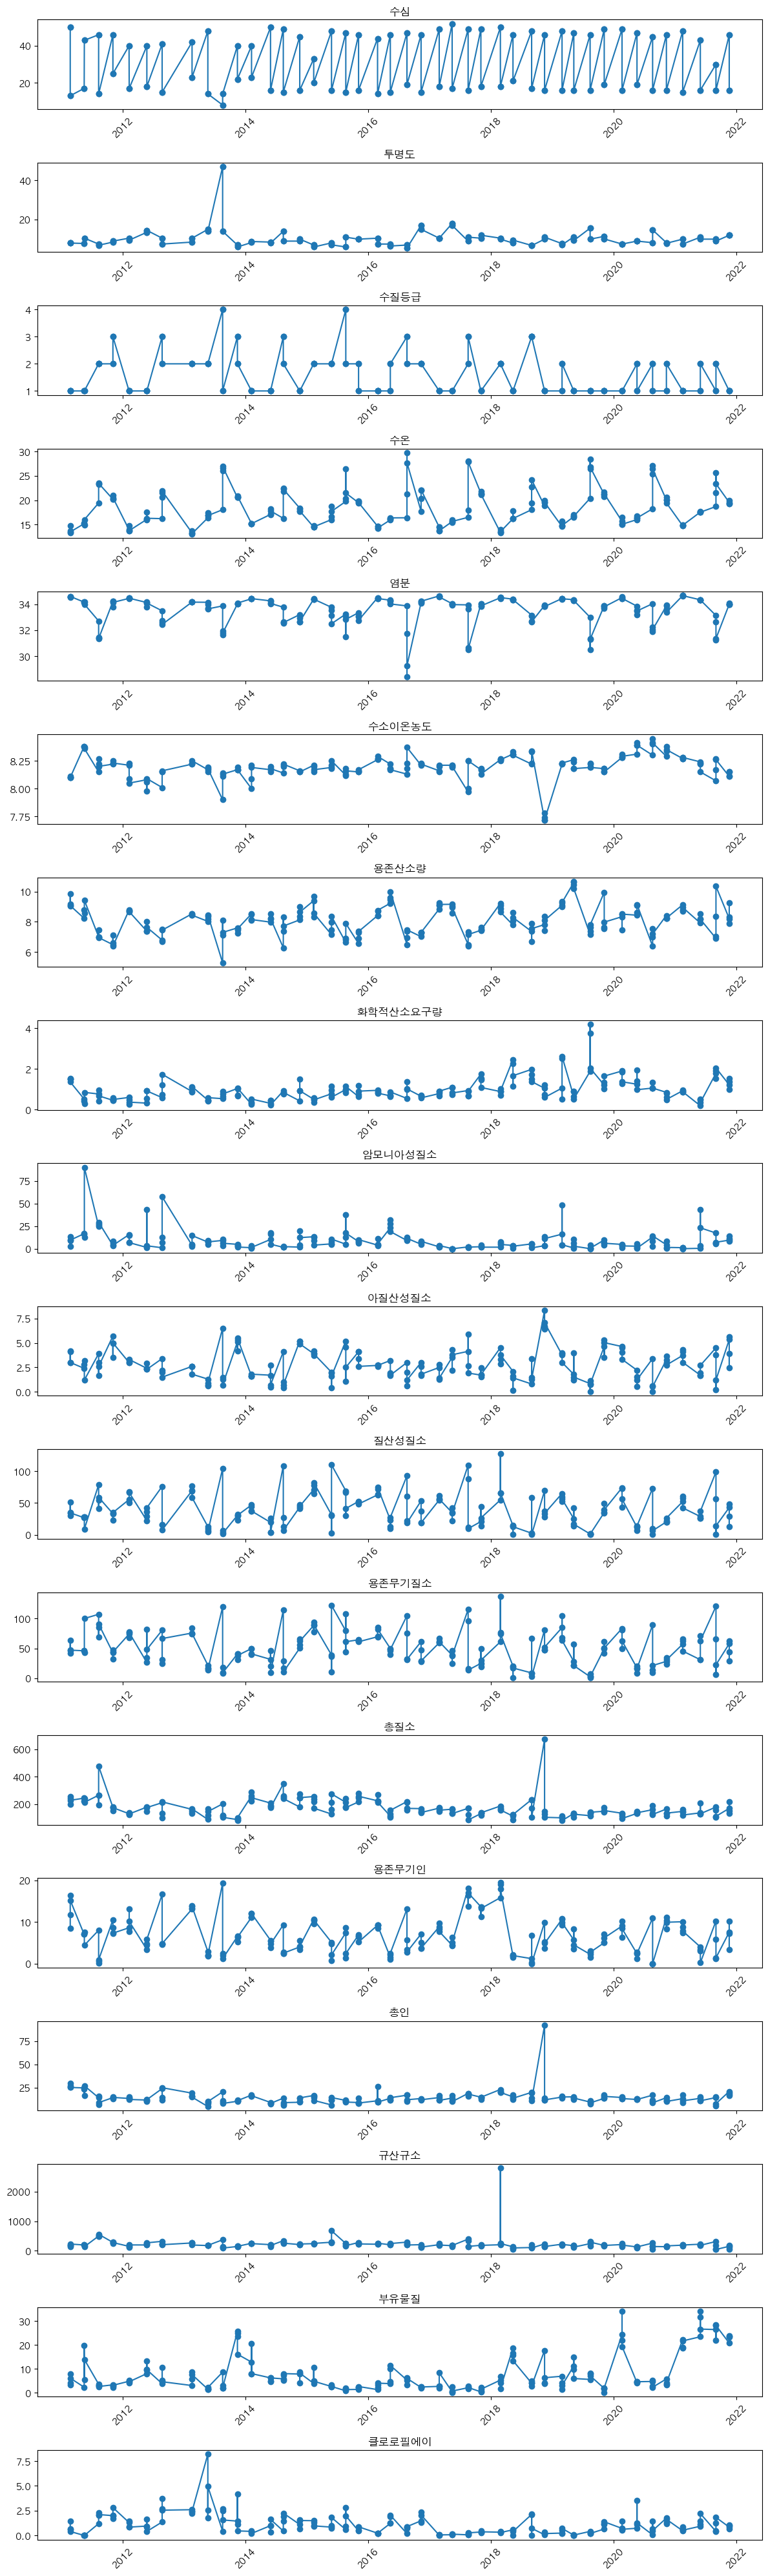

In [31]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(seongsan['측정 일자'], seongsan[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 수온과 상관관계가 상대적으로 높은 '수질등급', '화학적산소요구량','클로로필에이'의 움직임 파악

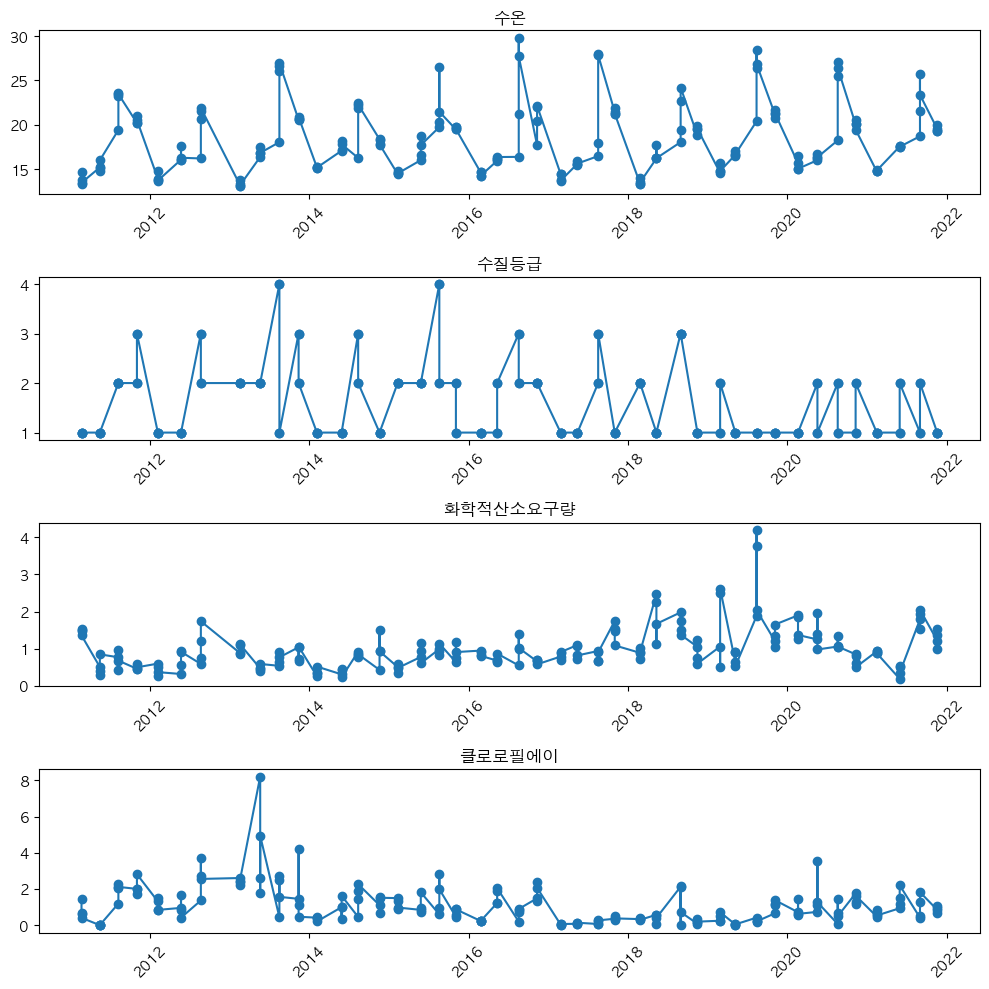

In [32]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(seongsan['측정 일자'], seongsan[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [33]:
# sklarn의 StandardScaler를 사용하여 값들을 정규분포르 정규화시긴 후 동일한 스케일내에서 값의 움직임을 파악하도록 함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features_for_standardization = seongsan.drop(['측정 일자','년','월','일'], axis=1).select_dtypes(include=['float64', 'int64'])

standardized_features = scaler.fit_transform(numerical_features_for_standardization)

standardized_features_df = pd.DataFrame(standardized_features, columns=numerical_features_for_standardization.columns)

seongsan = pd.concat([seongsan['측정 일자'], standardized_features_df], axis=1)

seongsan.head()


,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,계절_가을,계절_겨울,계절_봄,계절_여름
18,2021-11-18,-0.998767,-0.481478,0.540512,0.568320,0.291525,1.289386,0.120988,-0.316471,-0.019259,...,-0.382971,-0.604218,0.848528,-0.154303,1.0,-1.0,1.816590,-0.586302,-0.586302,-0.586302
19,2021-11-18,1.027034,-0.419118,-0.787604,0.434468,0.236393,0.843877,0.330766,-0.247130,-0.388128,...,-0.382971,-0.604218,0.848528,-0.154303,1.0,-1.0,1.816590,-0.586302,-0.586302,-0.586302
28,2021-11-18,-0.998767,-0.564625,-0.787604,-0.880427,0.769334,0.843877,0.425166,0.654309,-0.509276,...,-0.382971,-0.604218,0.848528,-0.154303,-1.0,1.0,-0.550482,1.705606,-0.586302,-0.586302
29,2021-11-18,1.229615,-0.564625,-0.787604,-0.510366,0.888786,1.022080,-0.665679,0.480956,-0.677437,...,-0.382971,-0.604218,0.848528,-0.154303,-1.0,1.0,-0.550482,1.705606,-0.586302,-0.586302
39,2021-08-31,1.027034,1.119099,-0.787604,0.523703,-0.572206,-0.047141,-0.990835,1.538413,-0.780503,...,-0.382971,-0.604218,0.848528,-0.154303,1.0,-1.0,-0.550482,-0.586302,-0.586302,1.705606


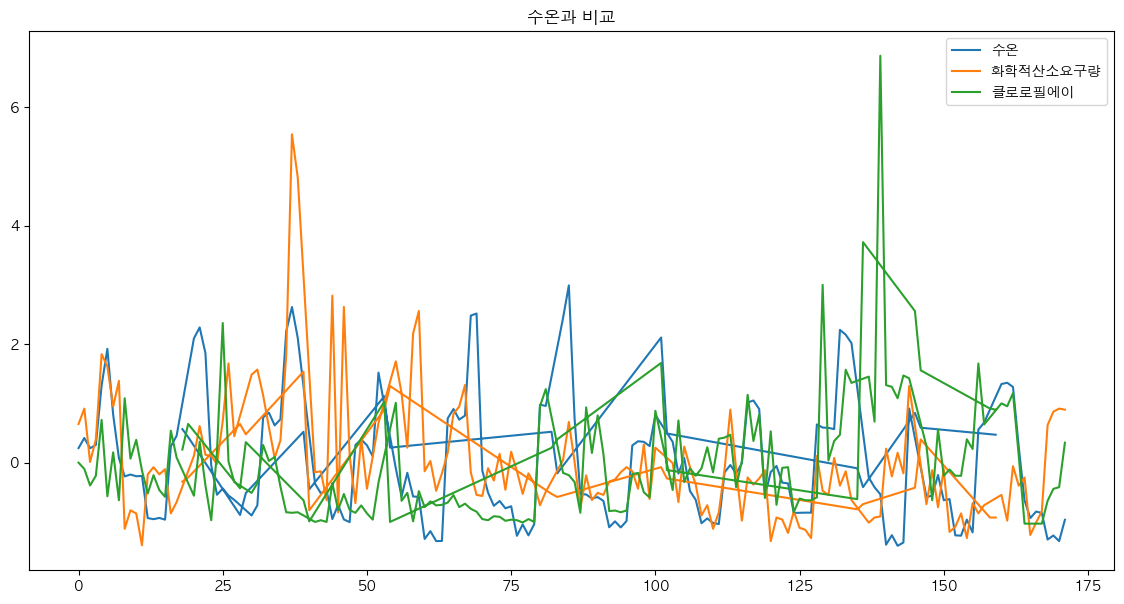

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(seongsan['수온'], label='수온')
#plt.plot(jeju['날씨_맑음'], label='날씨_맑음')
plt.plot(seongsan['화학적산소요구량'], label='화학적산소요구량')
plt.plot(seongsan['클로로필에이'], label='클로로필에이')

plt.title('수온과 비교')

plt.legend()
plt.show()

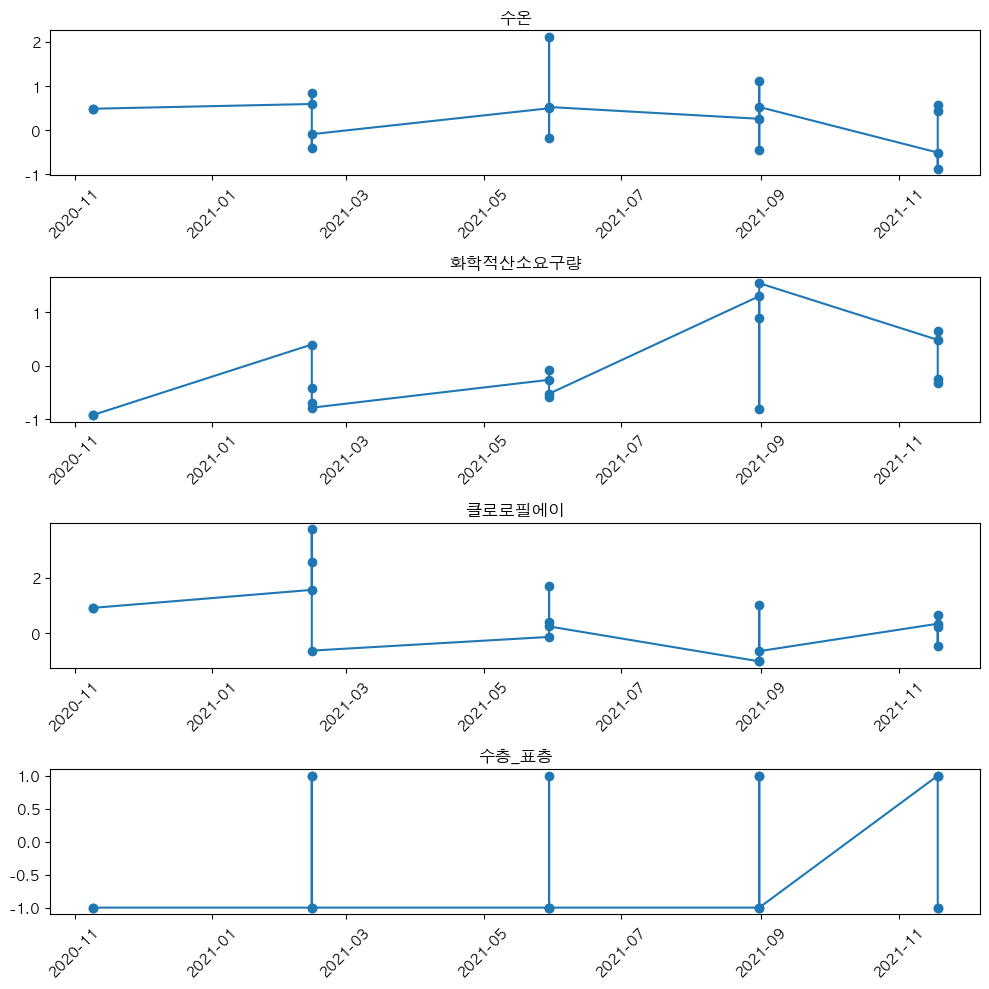

In [35]:
new_col = ['수온', '화학적산소요구량','클로로필에이','수층_표층']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(seongsan['측정 일자'], seongsan[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
